# "Human or Robot" 
## Predicting Auction Fraud

On an auction website, human bidders are becoming increasingly frustrated with their inability to win auctions vs. their software-controlled counterparts. As a result, usage from the site's core customer base is plummeting. In order to rebuild customer happiness, the site owners need to eliminate computer generated bidding from their auctions.

The goal of this project is to identify online auction bids that are placed by "robots", thus helping the site owners easily flag these users for removal from their site to prevent unfair auction activity.

<img src="../images/robots-greeting.png" width="500">

## FEATURE ENGINEERING

- Number of bids per auction by bidder_id
- Number of countries per bidder_id
- Number of IP addresses per bidder_id
- Number of URLs per bidder_id
- Number of same IP addresses per auction for bidder_id
- Difference in bidding time per bidder_id

Considering:
- Create unique bidder_id using time (year)
- Rearrange merchandise to columns and have values as number of bids for each bidder

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ignore the warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load df
auction_df = pd.read_csv('../large_data/auction_df')
auction_df.columns

Index(['bid_id', 'auction', 'merchandise', 'device', 'time', 'country', 'ip',
       'url', 'bidder_id', 'payment_account', 'address', 'outcome'],
      dtype='object')

### Feature Creation

In [3]:
# # bidding time difference per user (bidder_id)
# auction_df = auction_df.sort_values(by=['time'])
# auction_df['timediffs'] = auction_df.groupby('bidder_id')['time'].transform(pd.Series.diff)

# number of bids a user made per auction
bids_per_auction = auction_df.groupby(['auction', 'bidder_id']).size()
bids_per_auction = bids_per_auction.to_frame()

# number of countries per user
country_per_user = auction_df.groupby(['country', 'bidder_id']).size()
country_per_user = country_per_user.to_frame()

# number of device per user
device_per_user = auction_df.groupby(['device', 'bidder_id']).size()
device_per_user = device_per_user.to_frame()

# proportion of unique ip addresses to bids per user
ip_bids_per_user = auction_df.groupby('bidder_id')['ip'].nunique()/auction_df.groupby('bidder_id')['bid_id'].nunique()
ip_bids_per_user = ip_bids_per_user.to_frame()

# proportion of unique url addresses to bids per user
url_bids_per_user = auction_df.groupby('bidder_id')['url'].nunique()/auction_df.groupby('bidder_id')['bid_id'].nunique()
url_bids_per_user = url_bids_per_user.to_frame()

# proportion of bots for each country
bots_country = auction_df[auction_df['outcome'] == 1].groupby(
    'country').size()/auction_df.groupby('country').size()
bots_country = bots_country.fillna(0)
bots_country = bots_country.to_frame()

# proportion of bots per device
bots_device = auction_df[auction_df['outcome'] == 1].groupby(
    'device').size()/auction_df.groupby('device').size()
bots_device = bots_device.fillna(0)
bots_device = bots_device.to_frame()

# number of bids per user
bids_per_user = auction_df.groupby('bidder_id')['bid_id'].size()
bids_per_user = bids_per_user.to_frame()

# total unique URL per user
url_per_user = auction_df.groupby('bidder_id')['url'].nunique()
url_per_user = url_per_user.to_frame()

# total unique auction per user
auction_per_user = auction_df.groupby('bidder_id')['auction'].nunique()
auction_per_user = auction_per_user.to_frame()

# total unique ip per user
ip_per_user = auction_df.groupby('bidder_id')['ip'].nunique()
ip_per_user = ip_per_user.to_frame()

# number of bids a user made per device
bids_per_device = auction_df.groupby(['device', 'bidder_id']).size()
bids_per_device = bids_per_device.to_frame()

# number of bids a user made per country
bids_per_country = auction_df.groupby(['country', 'bidder_id']).size()
bids_per_country = bids_per_country.to_frame()

# mean number of bids per user for each auction
avg_bids_per_user = auction_df.groupby(['bidder_id', 'auction'])['bid_id'].count().groupby(
['bidder_id']).mean()
avg_bids_per_user = avg_bids_per_user.to_frame()

# median number of bids per user for each auction
median_bids_per_user = auction_df.groupby(['bidder_id', 'auction'])['bid_id'].count().groupby(
['bidder_id']).median()
median_bids_per_user = median_bids_per_user.to_frame()


In [4]:
# Second round of feature engineering
# mean number of countries per user for each auction
avg_country_per_user = auction_df.groupby(['bidder_id', 'auction'])['country'].nunique().groupby(
['bidder_id']).mean()
avg_country_per_user = avg_country_per_user.to_frame()

# median number of countries per user for each auction
median_country_per_user = auction_df.groupby(['bidder_id', 'auction'])['country'].nunique().groupby(
['bidder_id']).median()
median_country_per_user = median_country_per_user.to_frame()

# mean number of auctions per user for each country
avg_auction_per_country_user = auction_df.groupby(['bidder_id', 'country'])['auction'].count().groupby(
['bidder_id']).mean()
avg_auction_per_country_user = avg_auction_per_country_user.to_frame()

# median number of auctions per user for each country
median_auction_per_country_user = auction_df.groupby(['bidder_id', 'country'])['auction'].count().groupby(
['bidder_id']).median()
median_auction_per_country_user = median_auction_per_country_user.to_frame()

# mean number of url per device per user
avg_url_per_device_user = auction_df.groupby(['bidder_id', 'device'])['url'].count().groupby(
['bidder_id']).mean()
avg_url_per_device_user = avg_url_per_device_user.to_frame()

# median number of url per device for each user
median_url_per_device_user = auction_df.groupby(['bidder_id', 'device'])['url'].count().groupby(
['bidder_id']).median()
median_url_per_device_user = median_url_per_device_user.to_frame()

# mean number of ip per device for each user
avg_ip_per_device_user = auction_df.groupby(['bidder_id', 'device'])['ip'].count().groupby(
['bidder_id']).mean()
avg_ip_per_device_user = avg_ip_per_device_user.to_frame()

# median number of ip per device for each user
median_ip_per_device_user = auction_df.groupby(['bidder_id', 'device'])['ip'].count().groupby(
['bidder_id']).median()
median_ip_per_device_user = median_ip_per_device_user.to_frame()



In [5]:
# merge the features to auction_df 
auction_df = pd.merge(auction_df, bids_per_auction, on=['auction', 'bidder_id'], how='left')
auction_df = pd.merge(auction_df, country_per_user, on=['country', 'bidder_id'], how='left')
auction_df = pd.merge(auction_df, device_per_user, on=['device', 'bidder_id'], how='left')
auction_df = pd.merge(auction_df, ip_bids_per_user, on='bidder_id', how='left')
auction_df = pd.merge(auction_df, url_bids_per_user, on='bidder_id', how='left')
auction_df = pd.merge(auction_df, bots_country, on='country', how='left')
auction_df = pd.merge(auction_df, bots_device, on='device', how='left')
auction_df = pd.merge(auction_df, bids_per_user, on='bidder_id', how='left')
auction_df = pd.merge(auction_df, url_per_user, on='bidder_id', how='left')
auction_df = pd.merge(auction_df, auction_per_user, on='bidder_id', how='left')
auction_df = pd.merge(auction_df, ip_per_user, on='bidder_id', how='left')
auction_df = pd.merge(auction_df, bids_per_device, on=['device', 'bidder_id'], how='left')
auction_df = pd.merge(auction_df, bids_per_country, on=['country', 'bidder_id'], how='left')
auction_df = pd.merge(auction_df, avg_bids_per_user, on='bidder_id', how='left')
auction_df = pd.merge(auction_df, median_bids_per_user, on='bidder_id', how='left')

# second round
auction_df = pd.merge(auction_df, avg_country_per_user, on='bidder_id', how='left')
auction_df = pd.merge(auction_df, median_country_per_user, on='bidder_id', how='left')
auction_df = pd.merge(auction_df, avg_auction_per_country_user, on='bidder_id', how='left')
auction_df = pd.merge(auction_df, median_auction_per_country_user, on='bidder_id', how='left')
auction_df = pd.merge(auction_df, avg_url_per_device_user, on='bidder_id', how='left')
auction_df = pd.merge(auction_df, median_url_per_device_user, on='bidder_id', how='left')
auction_df = pd.merge(auction_df, avg_ip_per_device_user, on='bidder_id', how='left')
auction_df = pd.merge(auction_df, median_ip_per_device_user, on='bidder_id', how='left')


In [6]:
# update column names
auction_df.columns = ['bid_id', 'auction', 'merchandise', 'device', 'time',
               'country', 'ip', 'url', 'bidder_id', 'payment_account', 'address',
               'outcome', 'bids_per_auction', 'country_per_user', 
               'device_per_user', 'ip_bids_per_user', 'url_bids_per_user', 'bots_country', 
                'bots_device', 'bids_per_user', 'url_per_user', 'auction_per_user',
                'ip_per_user', 'bids_per_device', 'bids_per_coutry', 'avg_bids_per_user',
                'median_bids_per_user','avg_country_per_user', 'median_country_per_user', 'avg_auction_per_country_user',
                'median_auction_per_country_user', 'avg_url_per_device_user', 'median_url_per_device_user',
                'avg_ip_per_device_user', 'median_ip_per_device_user']
print(auction_df.columns)

auction_df

Index(['bid_id', 'auction', 'merchandise', 'device', 'time', 'country', 'ip',
       'url', 'bidder_id', 'payment_account', 'address', 'outcome',
       'bids_per_auction', 'country_per_user', 'device_per_user',
       'ip_bids_per_user', 'url_bids_per_user', 'bots_country', 'bots_device',
       'bids_per_user', 'url_per_user', 'auction_per_user', 'ip_per_user',
       'bids_per_device', 'bids_per_coutry', 'avg_bids_per_user',
       'median_bids_per_user', 'avg_country_per_user',
       'median_country_per_user', 'avg_auction_per_country_user',
       'median_auction_per_country_user', 'avg_url_per_device_user',
       'median_url_per_device_user', 'avg_ip_per_device_user',
       'median_ip_per_device_user'],
      dtype='object')


,bid_id,auction,merchandise,device,time,country,ip,url,bidder_id,payment_account,...,avg_bids_per_user,median_bids_per_user,avg_country_per_user,median_country_per_user,avg_auction_per_country_user,median_auction_per_country_user,avg_url_per_device_user,median_url_per_device_user,avg_ip_per_device_user,median_ip_per_device_user
0,85371.0,yitr4,home goods,phone35,9.759489e+15,ke,82.34.177.248,vasstdc27m7nks3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,...,1.333333,1.0,1.166667,1.0,4.0,2.0,1.714286,1.0,1.714286,1.0
1,274487.0,btpyy,home goods,phone1004,9.760249e+15,zm,202.130.71.167,vasstdc27m7nks3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,...,1.333333,1.0,1.166667,1.0,4.0,2.0,1.714286,1.0,1.714286,1.0
2,527436.0,kj2ko,home goods,phone4,9.762261e+15,ke,22.54.76.225,vasstdc27m7nks3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,...,1.333333,1.0,1.166667,1.0,4.0,2.0,1.714286,1.0,1.714286,1.0
3,554135.0,1m5t8,home goods,phone4,9.762431e+15,ke,32.13.237.126,vasstdc27m7nks3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,...,1.333333,1.0,1.166667,1.0,4.0,2.0,1.714286,1.0,1.714286,1.0
4,607628.0,btpyy,home goods,phone4,9.762789e+15,ke,202.236.188.240,vasstdc27m7nks3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,...,1.333333,1.0,1.166667,1.0,4.0,2.0,1.714286,1.0,1.714286,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071219,609792.0,jefix,mobile,phone316,9.762802e+15,id,28.18.7.49,ar89au37swuzvzz,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,...,2.000000,2.0,1.000000,1.0,2.0,2.0,1.000000,1.0,1.000000,1.0
3071220,2297899.0,jefix,mobile,phone33,9.772601e+15,id,161.237.171.157,ar89au37swuzvzz,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,...,2.000000,2.0,1.000000,1.0,2.0,2.0,1.000000,1.0,1.000000,1.0
3071221,3400601.0,jqx39,office equipment,phone11,9.636754e+15,sa,54.212.21.87,cgb17jpn1ixq9hw,0381a69b7a061e9ace2798fd48f1f537mgq57,fd87037ce0304077079c749f420f0b4c54uo0,...,1.000000,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0
3071222,2007255.0,ntjde,jewelry,phone59,9.770756e+15,ru,79.72.96.0,9ov8hm82p20sxlz,84a769adc98498f52debfe57b93a0789556f4,fbe0ce34d6546ebd9e4c63afc68b085byd2tf,...,2.000000,2.0,1.000000,1.0,2.0,2.0,2.000000,2.0,2.000000,2.0


## Visualization
Distribution of each new feature for human and robots

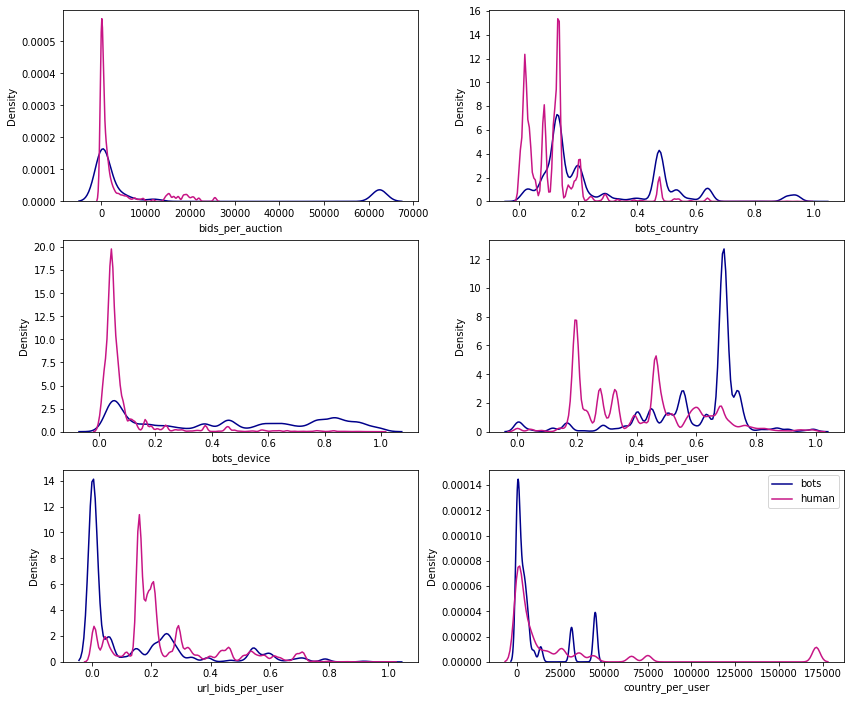

In [7]:
bots = auction_df.loc[auction_df.outcome == 1]
human = auction_df.loc[auction_df.outcome == 0]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12), sharex=False)

# bids_per_auction
sns.distplot(bots['bids_per_auction'], hist=False, kde=True,
             bins=int(180/5), color='darkblue',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 0])
sns.distplot(human['bids_per_auction'], hist=False, kde=True,
             bins=int(180/5), color='mediumvioletred',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 0])

# bots_country
sns.distplot(bots['bots_country'], hist=False, kde=True,
             bins=int(180/5), color='darkblue',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 1])
sns.distplot(human['bots_country'], hist=False, kde=True,
             bins=int(180/5), color='mediumvioletred',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 1])

# bots_device
sns.distplot(bots['bots_device'], hist=False, kde=True,
             bins=int(180/5), color='darkblue', label='bots',
             kde_kws={'linewidth': 1.5}, ax=axes[1, 0])
sns.distplot(human['bots_device'], hist=False, kde=True,
             bins=int(180/5), color='mediumvioletred', label='human',
             kde_kws={'linewidth': 1.5}, ax=axes[1, 0])

# ip_bids_per_user
sns.distplot(bots['ip_bids_per_user'], hist=False, kde=True,
             bins=int(180/5), color='darkblue',
             kde_kws={'linewidth': 1.5}, ax=axes[1, 1])
sns.distplot(human['ip_bids_per_user'], hist=False, kde=True,
             bins=int(180/5), color='mediumvioletred',
             kde_kws={'linewidth': 1.5}, ax=axes[1, 1])

# url_bids_per_user
sns.distplot(bots['url_bids_per_user'], hist=False, kde=True,
             bins=int(180/5), color='darkblue',
             kde_kws={'linewidth': 1.5}, ax=axes[2, 0])
sns.distplot(human['url_bids_per_user'], hist=False, kde=True,
             bins=int(180/5), color='mediumvioletred',
             kde_kws={'linewidth': 1.5}, ax=axes[2, 0])

# country_per_user
sns.distplot(bots['country_per_user'], hist=False, kde=True,
             bins=int(180/5), color='darkblue',
             kde_kws={'linewidth': 1.5}, ax=axes[2, 1])
sns.distplot(human['country_per_user'], hist=False, kde=True,
             bins=int(180/5), color='mediumvioletred',
             kde_kws={'linewidth': 1.5}, ax=axes[2, 1])

plt.legend(['bots', 'human'])
plt.show()

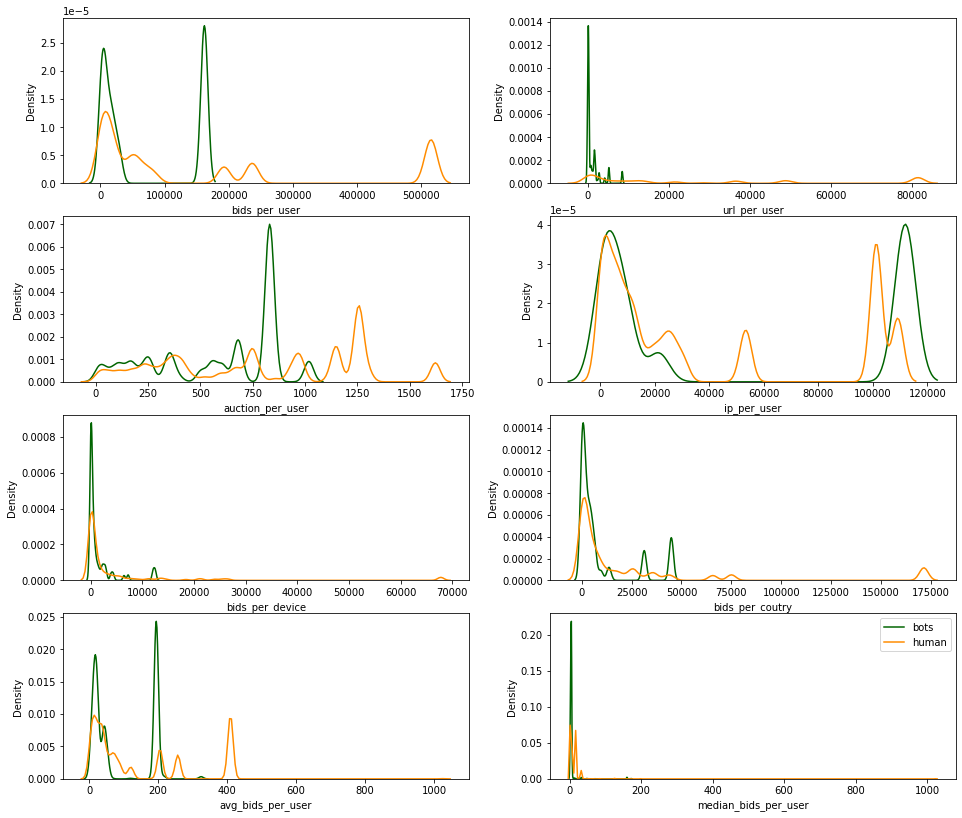

In [8]:
bots = auction_df.loc[auction_df.outcome == 1]
human = auction_df.loc[auction_df.outcome == 0]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 14), sharex=False)

# bids_per_auction
sns.distplot(bots['bids_per_user'], hist=False, kde=True,
             bins=int(180/5), color='darkgreen',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 0])
sns.distplot(human['bids_per_user'], hist=False, kde=True,
             bins=int(180/5), color='darkorange',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 0])

# bots_country
sns.distplot(bots['url_per_user'], hist=False, kde=True,
             bins=int(180/5), color='darkgreen',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 1])
sns.distplot(human['url_per_user'], hist=False, kde=True,
             bins=int(180/5), color='darkorange',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 1])

# bots_device
sns.distplot(bots['auction_per_user'], hist=False, kde=True,
             bins=int(180/5), color='darkgreen', label='bots',
             kde_kws={'linewidth': 1.5}, ax=axes[1, 0])
sns.distplot(human['auction_per_user'], hist=False, kde=True,
             bins=int(180/5), color='darkorange', label='human',
             kde_kws={'linewidth': 1.5}, ax=axes[1, 0])

# ip_bids_per_user
sns.distplot(bots['ip_per_user'], hist=False, kde=True,
             bins=int(180/5), color='darkgreen',
             kde_kws={'linewidth': 1.5}, ax=axes[1, 1])
sns.distplot(human['ip_per_user'], hist=False, kde=True,
             bins=int(180/5), color='darkorange',
             kde_kws={'linewidth': 1.5}, ax=axes[1, 1])

# url_bids_per_user
sns.distplot(bots['bids_per_device'], hist=False, kde=True,
             bins=int(180/5), color='darkgreen',
             kde_kws={'linewidth': 1.5}, ax=axes[2, 0])
sns.distplot(human['bids_per_device'], hist=False, kde=True,
             bins=int(180/5), color='darkorange',
             kde_kws={'linewidth': 1.5}, ax=axes[2, 0])

# country_per_user
sns.distplot(bots['bids_per_coutry'], hist=False, kde=True,
             bins=int(180/5), color='darkgreen',
             kde_kws={'linewidth': 1.5}, ax=axes[2, 1])
sns.distplot(human['bids_per_coutry'], hist=False, kde=True,
             bins=int(180/5), color='darkorange',
             kde_kws={'linewidth': 1.5}, ax=axes[2, 1])

# avg_bids_per_user
sns.distplot(bots['avg_bids_per_user'], hist=False, kde=True,
             bins=int(180/5), color='darkgreen',
             kde_kws={'linewidth': 1.5}, ax=axes[3, 0])
sns.distplot(human['avg_bids_per_user'], hist=False, kde=True,
             bins=int(180/5), color='darkorange',
             kde_kws={'linewidth': 1.5}, ax=axes[3, 0])

# median_bids_per_user
sns.distplot(bots['median_bids_per_user'], hist=False, kde=True,
             bins=int(180/5), color='darkgreen',
             kde_kws={'linewidth': 1.5}, ax=axes[3, 1])
sns.distplot(human['median_bids_per_user'], hist=False, kde=True,
             bins=int(180/5), color='darkorange',
             kde_kws={'linewidth': 1.5}, ax=axes[3, 1])

plt.legend(['bots', 'human'])
plt.show()

<AxesSubplot:>

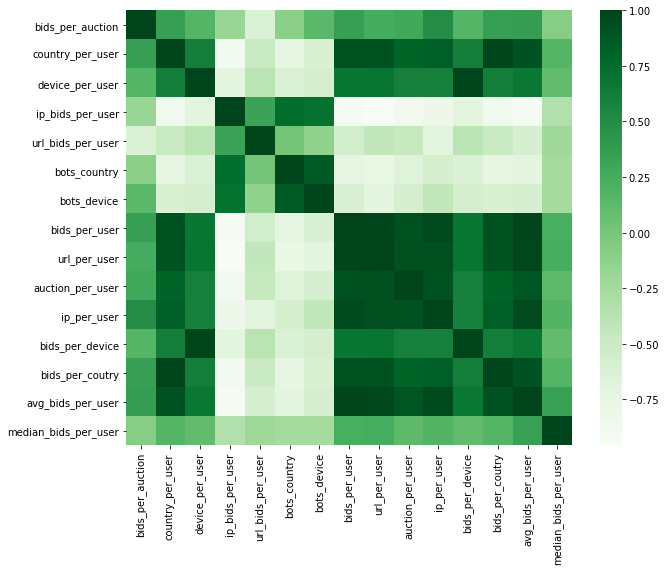

In [9]:
# filter variables of interest
df = auction_df[['bids_per_auction', 'country_per_user', 
                'device_per_user', 'ip_bids_per_user', 'url_bids_per_user', 'bots_country', 
                'bots_device', 'bids_per_user', 'url_per_user', 'auction_per_user',
                'ip_per_user', 'bids_per_device', 'bids_per_coutry', 'avg_bids_per_user',
                 'median_bids_per_user']]

plt.figure(figsize=(10, 8))

# plot the correlation matrix for the numerical values
corr_matrix = df.corr()
sns.heatmap(corr_matrix.corr(),
            xticklabels=corr_matrix.corr().columns,
            yticklabels=corr_matrix.corr().columns,
            cmap="Greens",
            fmt='d')

## Expand merchandise column

In [10]:
# merchandise by user
# rearrange merchandise to columns and have values as number of bids for each bidder
merchandise = auction_df.pivot_table(index='bidder_id', columns='merchandise', 
                 values='bid_id',
                 aggfunc = lambda x: len(x.unique()),
                                    fill_value=0)

merchandise = merchandise.reset_index()
merchandise.head()

merchandise,bidder_id,auto parts,books and music,clothing,computers,furniture,home goods,jewelry,mobile,office equipment,sporting goods
0,001068c415025a009fee375a12cff4fcnht8y,0,0,0,0,0,0,1,0,0,0
1,0030a2dd87ad2733e0873062e4f83954mkj86,0,0,0,0,0,0,0,1,0,0
2,00a0517965f18610417ee784a05f494d4dw6e,0,141,0,0,0,0,0,0,0,0
3,00cc97158e6f4cb8eac3c0075918b7ffi5k8o,0,0,0,0,0,0,0,0,3,0
4,01067975436d123f717ee5aba0dd4bbfa0937,0,0,0,0,0,0,543,0,0,0


<AxesSubplot:>

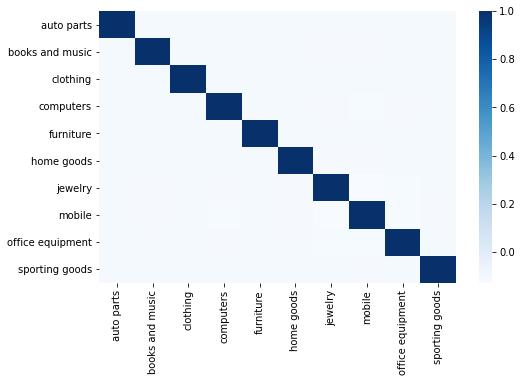

In [11]:
# filter outcome
outcome = auction_df[['bidder_id', 'outcome']]
outcome = outcome.drop_duplicates().reset_index()

# merge merchandise to outcome
merchandise_outcome_df = merchandise.merge(outcome, how='left', on='bidder_id')
merchandise_outcome_df.columns

#merchandise_outcome_df

# filter variables of interest
df1 = merchandise_outcome_df[['auto parts', 'books and music', 'clothing', 'computers',
       'furniture', 'home goods', 'jewelry', 'mobile', 'office equipment',
       'sporting goods']]

plt.figure(figsize=(8, 5))

# plot the correlation matrix for the numerical values
corr_matrix = df1.corr()
sns.heatmap(corr_matrix.corr(),
            xticklabels=corr_matrix.corr().columns,
            yticklabels=corr_matrix.corr().columns,
            cmap="Blues",
            fmt='d')

In [12]:
# merge auction_df to merchandise
auction_df = pd.merge(auction_df, merchandise, on='bidder_id', how='left')
print(auction_df.columns)

Index(['bid_id', 'auction', 'merchandise', 'device', 'time', 'country', 'ip',
       'url', 'bidder_id', 'payment_account', 'address', 'outcome',
       'bids_per_auction', 'country_per_user', 'device_per_user',
       'ip_bids_per_user', 'url_bids_per_user', 'bots_country', 'bots_device',
       'bids_per_user', 'url_per_user', 'auction_per_user', 'ip_per_user',
       'bids_per_device', 'bids_per_coutry', 'avg_bids_per_user',
       'median_bids_per_user', 'avg_country_per_user',
       'median_country_per_user', 'avg_auction_per_country_user',
       'median_auction_per_country_user', 'avg_url_per_device_user',
       'median_url_per_device_user', 'avg_ip_per_device_user',
       'median_ip_per_device_user', 'auto parts', 'books and music',
       'clothing', 'computers', 'furniture', 'home goods', 'jewelry', 'mobile',
       'office equipment', 'sporting goods'],
      dtype='object')


In [13]:
# see all columns
auction_df.T

,0,1,2,3,4,5,6,7,8,9,...,3071214,3071215,3071216,3071217,3071218,3071219,3071220,3071221,3071222,3071223
bid_id,85371.0,274487.0,527436.0,554135.0,607628.0,666164.0,700546.0,926676.0,960606.0,1023806.0,...,7245669.0,7245720.0,7253435.0,7253513.0,6977549.0,609792.0,2297899.0,3400601.0,2007255.0,2007533.0
auction,yitr4,btpyy,kj2ko,1m5t8,btpyy,1m5t8,0xo1d,pfl78,xs8rq,wzwhk,...,0rl6i,wumzl,1551c,22t0t,1olil,jefix,jefix,jqx39,ntjde,ntjde
merchandise,home goods,home goods,home goods,home goods,home goods,home goods,home goods,home goods,home goods,home goods,...,mobile,mobile,mobile,mobile,mobile,mobile,mobile,office equipment,jewelry,jewelry
device,phone35,phone1004,phone4,phone4,phone4,phone35,phone4,phone195,phone4,phone79,...,phone405,phone405,phone405,phone405,phone22,phone316,phone33,phone11,phone59,phone59
time,9759489368421052.0,9760248684210526.0,9762260578947368.0,9762430736842104.0,9762789000000000.0,9763163263157894.0,9763386105263156.0,9764266789473684.0,9764391578947368.0,9764657789473684.0,...,9706971000000000.0,9706971421052632.0,9707029526315788.0,9707030052631578.0,9705151684210526.0,9762802052631578.0,9772600526315788.0,9636754421052632.0,9770756157894736.0,9770757947368420.0
country,ke,zm,ke,ke,ke,ke,et,ke,ke,ng,...,th,th,th,th,ua,id,id,sa,ru,ru
ip,82.34.177.248,202.130.71.167,22.54.76.225,32.13.237.126,202.236.188.240,192.145.217.243,223.233.166.93,190.63.186.68,17.72.96.225,209.80.85.101,...,34.104.78.250,34.104.78.250,34.104.78.250,34.104.78.250,204.26.96.49,28.18.7.49,161.237.171.157,54.212.21.87,79.72.96.0,79.72.96.0
url,vasstdc27m7nks3,vasstdc27m7nks3,vasstdc27m7nks3,vasstdc27m7nks3,vasstdc27m7nks3,vasstdc27m7nks3,vasstdc27m7nks3,vasstdc27m7nks3,vasstdc27m7nks3,vasstdc27m7nks3,...,vasstdc27m7nks3,vasstdc27m7nks3,vasstdc27m7nks3,vasstdc27m7nks3,i4jeehlcim79jtu,ar89au37swuzvzz,ar89au37swuzvzz,cgb17jpn1ixq9hw,9ov8hm82p20sxlz,9ov8hm82p20sxlz
bidder_id,91a3c57b13234af24875c56fb7e2b2f4rb56a,91a3c57b13234af24875c56fb7e2b2f4rb56a,91a3c57b13234af24875c56fb7e2b2f4rb56a,91a3c57b13234af24875c56fb7e2b2f4rb56a,91a3c57b13234af24875c56fb7e2b2f4rb56a,91a3c57b13234af24875c56fb7e2b2f4rb56a,91a3c57b13234af24875c56fb7e2b2f4rb56a,91a3c57b13234af24875c56fb7e2b2f4rb56a,91a3c57b13234af24875c56fb7e2b2f4rb56a,91a3c57b13234af24875c56fb7e2b2f4rb56a,...,369515b3af4f8ca582f90271d30b14b6r52aw,369515b3af4f8ca582f90271d30b14b6r52aw,369515b3af4f8ca582f90271d30b14b6r52aw,369515b3af4f8ca582f90271d30b14b6r52aw,f939c17ffc7c39ac9b35b69e5e75179fv9pe2,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,0381a69b7a061e9ace2798fd48f1f537mgq57,84a769adc98498f52debfe57b93a0789556f4,84a769adc98498f52debfe57b93a0789556f4
payment_account,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228754av,...,a1f85275793c4a782f0a668711f41b927ivc9,a1f85275793c4a782f0a668711f41b927ivc9,a1f85275793c4a782f0a668711f41b927ivc9,a1f85275793c4a782f0a668711f41b927ivc9,a3d2de7675556553a5f08e4c88d2c2286s1m2,a3d2de7675556553a5f08e4c88d2c22856leq,a3d2de7675556553a5f08e4c88d2c22856leq,fd87037ce0304077079c749f420f0b4c54uo0,fbe0ce34d6546ebd9e4c63afc68b085byd2tf,fbe0ce34d6546ebd9e4c63afc68b085byd2tf


## Filter to bidder_id level

In [14]:
# drop variables that will not be used for ml models

# return unique by column 'bidder_id' rows indexes
idx = auction_df['bidder_id'].drop_duplicates().index

# return filtered df
df = auction_df.loc[idx,:]
df = df.reset_index()

# check result
df

,index,bid_id,auction,merchandise,device,time,country,ip,url,bidder_id,...,auto parts,books and music,clothing,computers,furniture,home goods,jewelry,mobile,office equipment,sporting goods
0,0,85371.0,yitr4,home goods,phone35,9.759489e+15,ke,82.34.177.248,vasstdc27m7nks3,91a3c57b13234af24875c56fb7e2b2f4rb56a,...,0,0,0,0,0,24,0,0,0,0
1,24,858913.0,jefix,office equipment,phone293,9.764047e+15,id,19.186.111.152,vgbf6zjir47a9y8,624f258b49e77713fc34034560f93fb3hu3jo,...,0,0,0,0,0,0,0,0,3,0
2,27,1125558.0,udb7l,sporting goods,phone111,9.765400e+15,id,63.67.37.44,i7m2pm7a1w52dqd,1c5f4fc669099bfbfac515cd26997bd12ruaj,...,0,0,0,0,0,0,0,0,0,4
3,31,7189256.0,1kbfl,books and music,phone58,9.706442e+15,my,101.146.132.199,vasstdc27m7nks3,4bee9aba2abda51bf43d639013d6efe12iycd,...,0,1,0,0,0,0,0,0,0,0
4,32,715.0,gjknq,office equipment,phone17,9.759247e+15,in,47.177.176.225,yns5v91tkyafrzb,4ab12bc61c82ddd9c2d65e60555808acqgos1,...,0,0,0,0,0,0,0,0,155,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,3071182,2780268.0,zlizu,mobile,phone150,9.633559e+15,in,13.8.91.203,tgc0vnjc9pbry2q,369515b3af4f8ca582f90271d30b14b6r52aw,...,0,0,0,0,0,0,0,36,0,0
1980,3071218,6977549.0,1olil,mobile,phone22,9.705152e+15,ua,204.26.96.49,i4jeehlcim79jtu,f939c17ffc7c39ac9b35b69e5e75179fv9pe2,...,0,0,0,0,0,0,0,1,0,0
1981,3071219,609792.0,jefix,mobile,phone316,9.762802e+15,id,28.18.7.49,ar89au37swuzvzz,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,...,0,0,0,0,0,0,0,2,0,0
1982,3071221,3400601.0,jqx39,office equipment,phone11,9.636754e+15,sa,54.212.21.87,cgb17jpn1ixq9hw,0381a69b7a061e9ace2798fd48f1f537mgq57,...,0,0,0,0,0,0,0,0,1,0


In [15]:
# drop columns 'bid_id', 'auction', 'merchandise', 'device', 'time', 'country', 'ip', 'url', 'bidder_id', 'payment_account', 'address' 
df = df.drop(['index', 'bid_id', 'auction', 'merchandise', 'device', 'time', 'country', 
        'ip', 'url', 'bidder_id', 'payment_account', 'address'], axis=1)
df.head()

,outcome,bids_per_auction,country_per_user,device_per_user,ip_bids_per_user,url_bids_per_user,bots_country,bots_device,bids_per_user,url_per_user,...,auto parts,books and music,clothing,computers,furniture,home goods,jewelry,mobile,office equipment,sporting goods
0,0.0,1,13,3,0.833333,0.041667,0.035496,0.035398,24,1,...,0,0,0,0,0,24,0,0,0,0
1,0.0,3,3,2,1.000000,0.666667,0.117633,0.036213,3,2,...,0,0,0,0,0,0,0,0,3,0
2,0.0,1,4,1,1.000000,0.500000,0.117633,0.057771,4,2,...,0,0,0,0,0,0,0,0,0,4
3,0.0,1,1,1,1.000000,1.000000,0.119444,0.086780,1,1,...,0,1,0,0,0,0,0,0,0,0
4,0.0,24,154,10,0.793548,0.587097,0.133801,0.376871,155,91,...,0,0,0,0,0,0,0,0,155,0


In [17]:
# save df to csv
# df.to_csv("features-outcome-df", index=False)

-------